<a href="https://colab.research.google.com/github/nouraoaldawsari/T5/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
#reading the data
data = pd.read_csv("/content/drive/MyDrive/T5/Datasets/Task (2) Dataset.csv")

## 1. Exploratory Data Analysis (EDA)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [188]:
data.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [189]:
data.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


In [190]:
data.sample(10)

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
34216,Dubai,2023-07-24 17:46:30,31,342,1248.0,206.4,33,78.169761,72.319991
44190,Kuwait,2023-04-06 09:46:30,29,119,455.1,91.5,38,62.014125,71.232256
46646,Kuwait,2023-07-19 11:31:30,7,17,52.1,7.4,13,68.637685,59.772276
16682,Dammam,2023-07-18 08:16:30,9,18,46.0,11.6,7,67.602505,61.155952
8151,Cairo,2023-01-03 02:01:30,0,3,12.2,1.0,0,NaN,NaN
57745,Medina,2023-12-06 22:01:30,9,18,53.6,5.4,10,79.432881,75.113555
52984,Mecca,2023-10-30 13:16:30,5,25,88.8,10.4,4,65.610391,65.195498
17914,Dammam,2023-09-07 16:46:00,23,64,208.8,53.8,24,70.822118,71.844156
64815,Riyadh,2023-09-30 08:46:30,7,32,139.3,30.4,1,60.725621,61.430297
2094,Abudhabi,2023-10-02 14:31:30,21,58,188.7,27.3,19,61.658385,64.949029


In [191]:
#clean data
data.isna().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

In [192]:
data[['TravelTimeHistoric','TravelTimeLive']]

,TravelTimeHistoric,TravelTimeLive
0,59.611918,54.803617
1,60.221387,56.118629
2,59.161978,55.518834
3,59.738138,56.413917
4,58.958314,56.059246
...,...,...
66634,63.926569,63.245473
66635,59.182641,60.012955
66636,57.746816,57.561438
66637,56.535277,55.463218


In [193]:
#Imputation
from sklearn.impute import SimpleImputer
data_plus = data[['TravelTimeHistoric','TravelTimeLive']]
my_imputer = SimpleImputer()

for col in data:
  data[col + '_was_missing'] = data[col].isnull()

imputed_data = pd.DataFrame(my_imputer.fit_transform(data_plus))
imputed_data.columns = data_plus.columns
imputed_data

,TravelTimeHistoric,TravelTimeLive
0,59.611918,54.803617
1,60.221387,56.118629
2,59.161978,55.518834
3,59.738138,56.413917
4,58.958314,56.059246
...,...,...
66634,63.926569,63.245473
66635,59.182641,60.012955
66636,57.746816,57.561438
66637,56.535277,55.463218


In [194]:
# data = data.drop(['TravelTimeHistoric','TravelTimeLive'], axis = 1)

In [195]:
merged_data = pd.merge(data, imputed_data, on='TravelTimeHistoric', how = 'inner')
merged_data = pd.merge(data, imputed_data, on='TravelTimeLive', how = 'inner')

In [196]:
data.isna().sum()

City                                  0
Datetime                              0
TrafficIndexLive                      0
JamsCount                             0
JamsDelay                             0
JamsLength                            0
TrafficIndexWeekAgo                   0
TravelTimeHistoric                 3867
TravelTimeLive                     3867
City_was_missing                      0
Datetime_was_missing                  0
TrafficIndexLive_was_missing          0
JamsCount_was_missing                 0
JamsDelay_was_missing                 0
JamsLength_was_missing                0
TrafficIndexWeekAgo_was_missing       0
TravelTimeHistoric_was_missing        0
TravelTimeLive_was_missing            0
dtype: int64

In [197]:
imputed_data.isna().sum()

TravelTimeHistoric    0
TravelTimeLive        0
dtype: int64

In [198]:
merged_data.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric_x,TravelTimeLive,City_was_missing,Datetime_was_missing,TrafficIndexLive_was_missing,JamsCount_was_missing,JamsDelay_was_missing,JamsLength_was_missing,TrafficIndexWeekAgo_was_missing,TravelTimeHistoric_was_missing,TravelTimeLive_was_missing,TravelTimeHistoric_y
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,False,False,False,False,False,False,False,False,False,59.611918
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,False,False,False,False,False,False,False,False,False,60.221387
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,False,False,False,False,False,False,False,False,False,59.161978
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,False,False,False,False,False,False,False,False,False,59.738138
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,False,False,False,False,False,False,False,False,False,58.958314


### Perform summary statistics on the dataset.

In [199]:
merged_data.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric_x,TravelTimeLive,TravelTimeHistoric_y
count,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000
mean,13.833254,72.496272,280.907076,47.839376,13.776015,70.706601,70.048451,70.706601
std,13.351428,106.446954,465.081017,83.865130,13.318024,10.588384,11.966725,10.588384
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235,49.381346
25%,3.000000,8.000000,26.700000,2.900000,3.000000,63.142591,60.712805,63.142591
50%,10.000000,27.000000,92.100000,11.700000,10.000000,68.894790,68.247303,68.894790
75%,21.000000,92.000000,324.125000,50.900000,21.000000,76.250975,77.043739,76.250975
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139,120.140593


### Identify and analyze patterns in the data.

<Axes: ylabel='Frequency'>

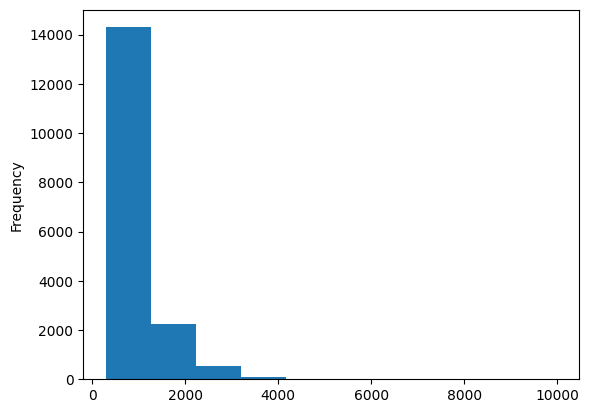

In [200]:
merged_data[merged_data['JamsDelay'] > 288]['JamsDelay'].plot.hist()

<Axes: ylabel='Frequency'>

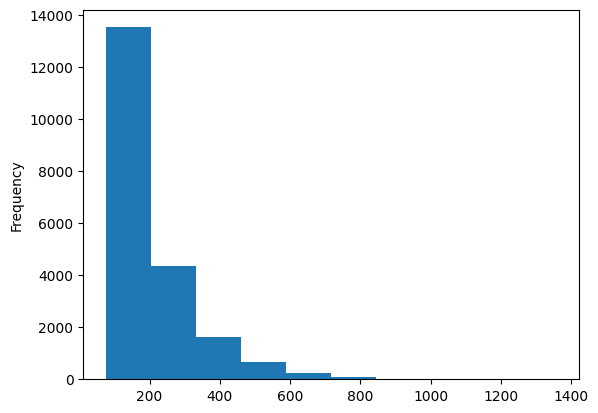

In [201]:
data[data['JamsCount'] > 74]['JamsCount'].plot.hist()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

<Axes: xlabel='JamsCount', ylabel='TrafficIndexLive'>

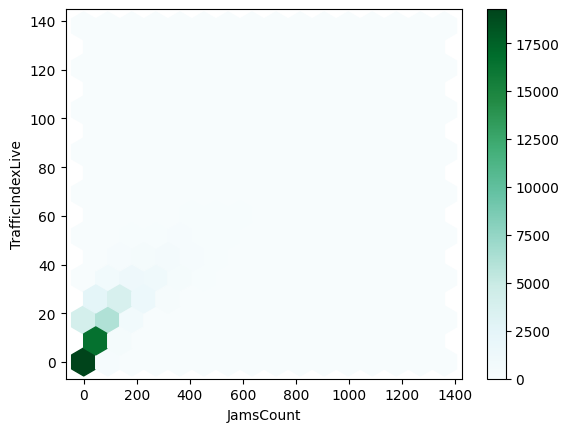

In [202]:
merged_data.plot.hexbin(x = 'JamsCount' , y = 'TrafficIndexLive', gridsize = 15)

<Axes: >

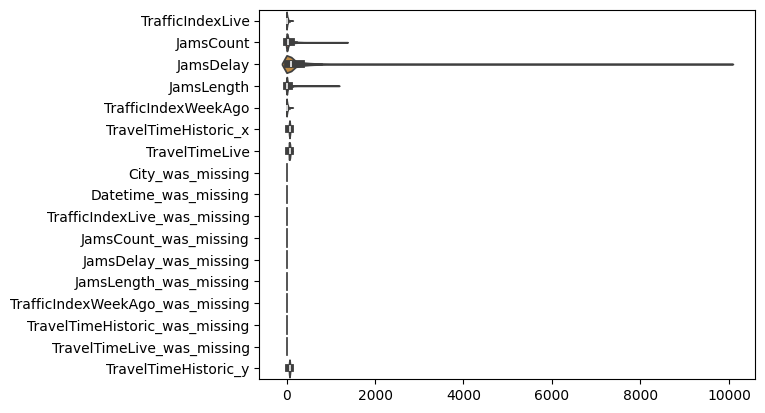

In [203]:
sns.violinplot(data = merged_data, orient = 'h')

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


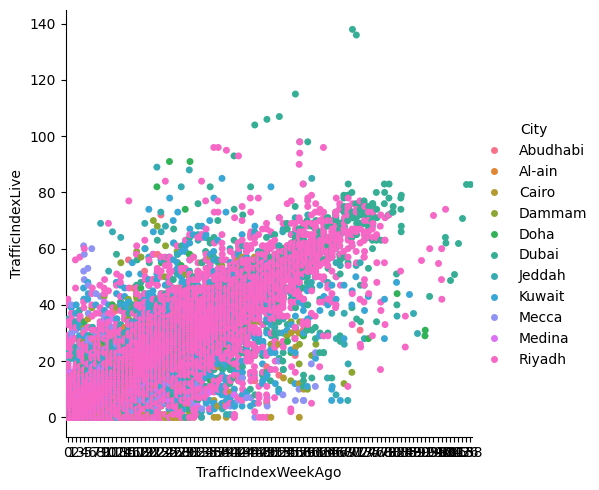

In [204]:
sns.catplot(data=merged_data, x="TrafficIndexWeekAgo", y="TrafficIndexLive", hue="City") #since it is categrical data

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: ylabel='TrafficIndexLive'>

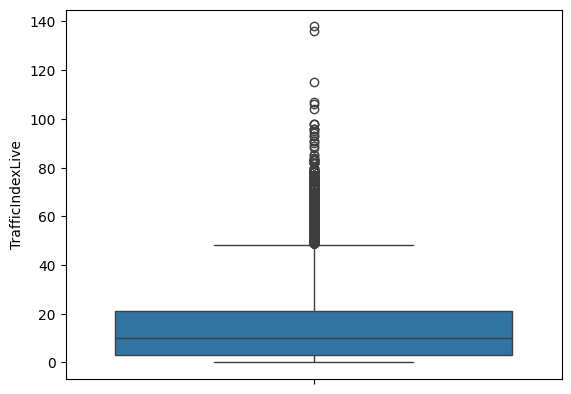

In [223]:
#looking for outliers
sns.boxplot(merged_data['TrafficIndexLive'])

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [213]:
#reading the data
data = pd.read_csv("/content/drive/MyDrive/T5/Datasets/Task (2) Dataset.csv")

In [215]:
#Imputation
from sklearn.impute import SimpleImputer
data_plus = data[['TravelTimeHistoric','TravelTimeLive']]
my_imputer = SimpleImputer()

imputed_data = pd.DataFrame(my_imputer.fit_transform(data_plus))
imputed_data.columns = data_plus.columns

merged_data = pd.merge(data, imputed_data, on='TravelTimeHistoric', how = 'inner')
merged_data = pd.merge(data, imputed_data, on='TravelTimeLive', how = 'inner')

In [217]:
numrical_cols = merged_data.drop(['City', 'Datetime'], axis = 1)
corr_matrix = numrical_cols.corr()
corr_matrix

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric_x,TravelTimeLive,TravelTimeHistoric_y
TrafficIndexLive,1.000000,0.873597,0.857590,0.863189,0.906485,0.331072,0.642326,0.331072
JamsCount,0.873597,1.000000,0.982294,0.953734,0.806717,0.305166,0.566874,0.305166
JamsDelay,0.857590,0.982294,1.000000,0.963050,0.773860,0.303733,0.571188,0.303733
JamsLength,0.863189,0.953734,0.963050,1.000000,0.786375,0.306312,0.569065,0.306312
TrafficIndexWeekAgo,0.906485,0.806717,0.773860,0.786375,1.000000,0.327349,0.573365,0.327349
TravelTimeHistoric_x,0.331072,0.305166,0.303733,0.306312,0.327349,1.000000,0.892562,1.000000
TravelTimeLive,0.642326,0.566874,0.571188,0.569065,0.573365,0.892562,1.000000,0.892562
TravelTimeHistoric_y,0.331072,0.305166,0.303733,0.306312,0.327349,1.000000,0.892562,1.000000


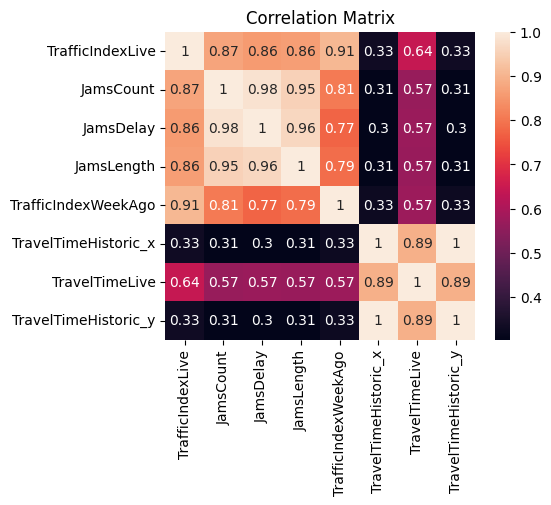

In [218]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix")
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [219]:
'''
Data shows most traffic in Riyadh by scatter plot
and a strong relation between variables (Jamscount/delay/length) which is making sense
and weak relation between the variables (Jamscount/delay/length) and TravelTimeHistoric

'''

'\nData shows most traffic in Riyadh by scatter plot\nand a strong relation between variables (Jamscount/delay/length) which is making sense\nand weak relation between the variables (Jamscount/delay/length) and TravelTimeHistoric\n\n'